In [490]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)

In [491]:
df1=pd.read_csv("E:\Data\Bengaluru_House_Data.csv")

In [492]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [493]:
df1.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [494]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [495]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [496]:
df2=df1.drop(["area_type","society","balcony","availability"],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [497]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [498]:
size=df2['size'].str.split(" ", n = 1, expand = True)  
df2['BHK']=size[0]

df2["BHK"] = df2.BHK.astype(float)

In [544]:
df2.dtypes


location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK           float64
dtype: object

In [500]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0


In [548]:
df3=df2.drop(["size"],axis=1)
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [549]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [550]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [551]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,2957 - 3450,NaN,224.500,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0
...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,122.000,3.0
13059,Harlur,1200 - 1470,2.0,72.760,2.0
13240,Devanahalli,1020 - 1130,NaN,52.570,1.0
13265,Hoodi,1133 - 1384,2.0,59.135,2.0


In [505]:
# col_30=df3['total_sqft'].values[30]
# tokens=col_30.split('-')
# print(tokens)   OUTPUT: ['2100 ', ' 2850']
# print(len(tokens))    OUTPUT: 2

In [506]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [507]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [508]:
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [509]:
df3["price_per_square_feet"]= df3["price"]*100000/df3["total_sqft"]

In [510]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_square_feet
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [511]:
location_stats = df3.groupby("location").location.agg("count").sort_values(ascending=False)
location_below_10=location_stats[location_stats<=10]

In [512]:
location_stats

location
Whitefield                              540
Sarjapur  Road                          399
Electronic City                         302
Kanakpura Road                          273
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1305, dtype: int64

In [513]:
location_below_10

location
BTM 1st Stage                           10
Basapura                                10
Ganga Nagar                             10
1st Block Koramangala                   10
Dodsworth Layout                        10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
 Anekal                                  1
Name: location, Length: 1064, dtype: int64

In [514]:
len(df3.location.unique())

1306

In [515]:
df3.dtypes


location                  object
total_sqft               float64
bath                     float64
price                    float64
BHK                      float64
price_per_square_feet    float64
dtype: object

In [516]:
df3["location"]=df3["location"].apply(lambda x: 'other' if x in location_below_10 else x)

In [517]:
df3.head(10)

,location,total_sqft,bath,price,BHK,price_per_square_feet
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3.0,4828.244275
9,other,1020.0,6.0,370.00,6.0,36274.509804


In [518]:
len(df3.location.unique())

243

In [519]:
df3.shape

(13320, 6)

In [520]:
df4=df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12576, 6)

In [521]:
df4.price_per_square_feet.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square_feet, dtype: float64

In [522]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_square_feet)
        st=np.std(subdf.price_per_square_feet)
        reduced_df = subdf[(subdf.price_per_square_feet>(m-st)) & (subdf.price_per_square_feet<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [523]:
df5=remove_pps_outliers(df4)
df5.shape

(10303, 6)

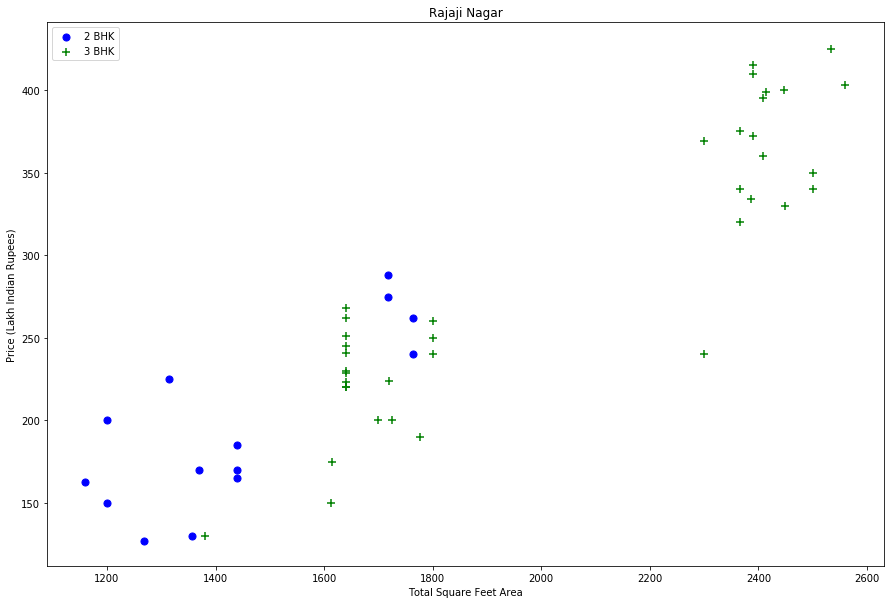

In [524]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

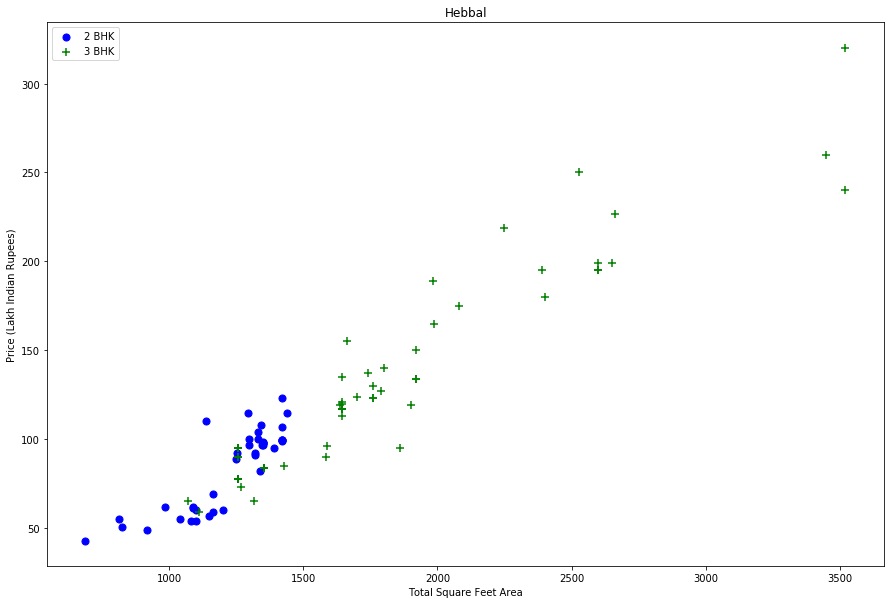

In [525]:
plot_scatter_chart(df5,"Hebbal")


In [552]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_square_feet),
                'std': np.std(bhk_df.price_per_square_feet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_square_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df6)

df5.shape

(7265, 6)

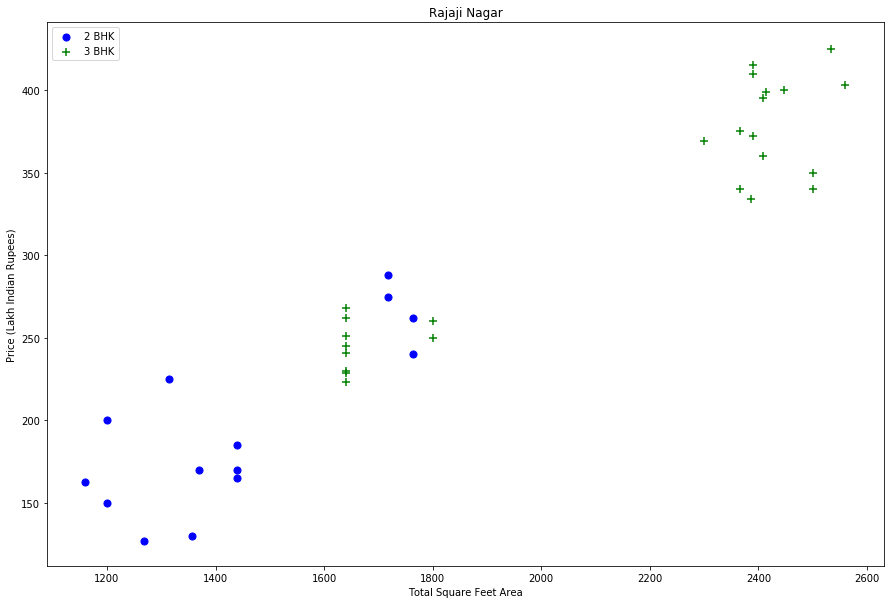

In [553]:
plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

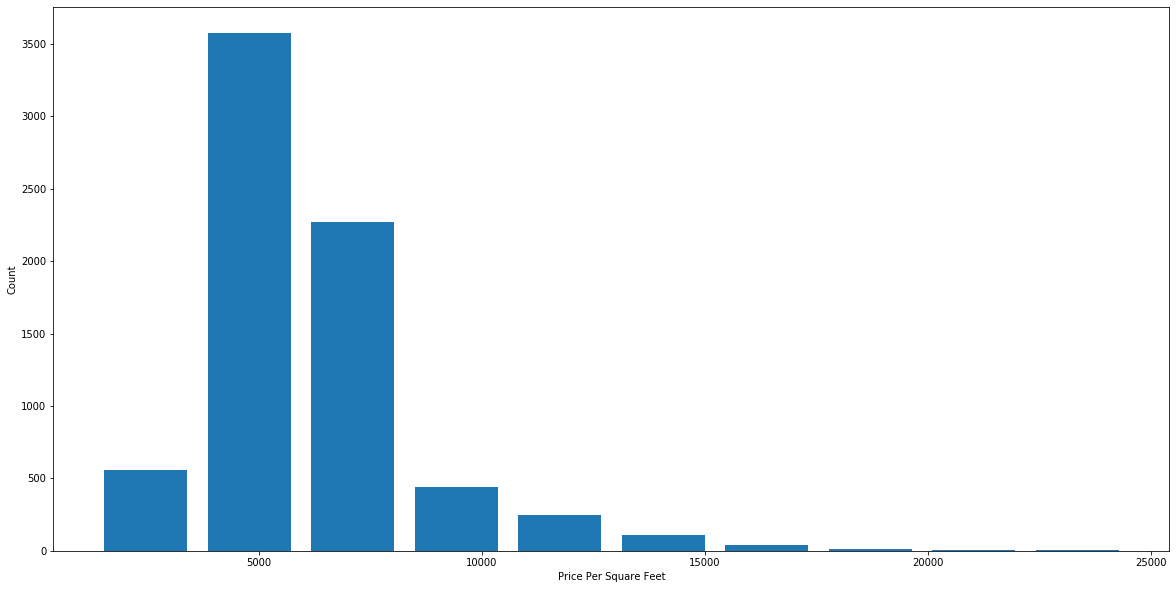

In [554]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_square_feet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [555]:
df5.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [556]:
df6=df5[df5.bath<df5.BHK+2]
df6.shape

(7265, 6)

In [580]:
df6.head()

,location,total_sqft,bath,price,BHK,price_per_square_feet
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,4540.654699


In [558]:
dummies=pd.get_dummies(df6.location)

In [583]:
data= df6.copy()
mapper= data.groupby('location')['price'].mean().to_dict()

In [586]:
data['location_encode']=data['location'].map(mapper)

In [559]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,total_sqft,bath,price,BHK,price_per_square_feet,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,4540.654699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [560]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [ ]:
#mapper=df7.grouby('location')['price'].mean().tolist()

In [587]:
df8=data.drop(["location"],axis='columns')
df8.head()

,total_sqft,bath,price,BHK,price_per_square_feet,location_encode
1,1250.0,2.0,40.0,2.0,3200.000000,54.818182
2,1200.0,2.0,83.0,2.0,6916.666667,54.818182
3,1170.0,2.0,40.0,2.0,3418.803419,54.818182
4,1425.0,2.0,65.0,3.0,4561.403509,54.818182
5,947.0,2.0,43.0,2.0,4540.654699,54.818182


In [588]:
x=df8.drop(['price'],axis='columns')
x

,total_sqft,bath,BHK,price_per_square_feet,location_encode
1,1250.0,2.0,2.0,3200.000000,54.818182
2,1200.0,2.0,2.0,6916.666667,54.818182
3,1170.0,2.0,2.0,3418.803419,54.818182
4,1425.0,2.0,3.0,4561.403509,54.818182
5,947.0,2.0,2.0,4540.654699,54.818182
...,...,...,...,...,...
10294,1200.0,2.0,2.0,5833.333333,135.355061
10295,1800.0,1.0,1.0,11111.111111,135.355061
10298,1353.0,2.0,2.0,8130.081301,135.355061
10299,812.0,1.0,1.0,3201.970443,135.355061


In [589]:
x.columns.unique()

Index(['total_sqft', 'bath', 'BHK', 'price_per_square_feet',
       'location_encode'],
      dtype='object')

In [591]:
y=df8.price
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10294     70.0
10295    200.0
10298    110.0
10299     26.0
10302    400.0
Name: price, Length: 7265, dtype: float64

In [566]:
# Y=y.values.reshape(10152,1)
# Y.shape

In [598]:
df8.columns.tolist()

['total_sqft',
 'bath',
 'price',
 'BHK',
 'price_per_square_feet',
 'location_encode']

In [599]:
X_train, X_test, y_train, y_test = train_test_split(df8.loc[:,['total_sqft',
 'bath',
 'BHK',
 'price_per_square_feet',
 'location_encode']], df8['price'], test_size=0.2)

In [600]:
X_train.shape, y_train.shape

((5812, 5), (5812,))

In [592]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [593]:
x_train.shape,y_train.shape

((5812, 5), (1453, 5))

In [594]:
y_train

,total_sqft,bath,BHK,price_per_square_feet,location_encode
7611,3453.0,4.0,4.0,7153.200116,128.789748
880,1100.0,2.0,2.0,3545.454545,77.832110
5663,1280.0,3.0,3.0,4500.000000,59.404714
1863,2180.0,3.0,3.0,13073.394495,139.300000
1328,1307.0,2.0,2.0,3825.554705,58.464286
...,...,...,...,...,...
7047,1055.0,2.0,2.0,4298.578199,54.926923
6392,1555.0,3.0,3.0,3344.051447,45.612857
4564,1580.0,3.0,3.0,10126.582278,197.452632
6597,2273.0,3.0,3.0,6995.160581,117.729615


In [578]:
y


array([[ 40.],
       [ 83.],
       [ 40.],
       ...,
       [110.],
       [ 26.],
       [400.]])

In [576]:
y=y.values.reshape(7265,1)
y.shape

(7265, 1)

In [601]:
from sklearn.linear_model import LinearRegression 
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8590975878889281

In [602]:
data.location.nunique()

242